In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sp

pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)
sns.set_theme(context="paper", font_scale=1.5, style="ticks", rc={"axes.grid": True})

## Feature importance with a new method

In [2]:
# Read Data (NEW from PP)
df = pd.read_csv("./data/features_and_response.noscale.csv", index_col=0)

# Drop NaNs
df.dropna(inplace=True)

# Collect Features and Labels
features_df = pd.DataFrame()
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)

features_df["occ_total_sum"] = df["occ_total_sum"]
features_df["oldest_phylostratum"] = df["oldest_phylostratum"]
features_df = pd.concat([features_df, conf], axis=1)

X = features_df.to_numpy()
y = df["response"].to_numpy()

features_df.head()

,occ_total_sum,oldest_phylostratum,cds_length,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,CAT_freq,CCA_freq,CCC_freq,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq
1,33,12,1488,0.612230,0.758065,0.561429,1.000000,0.216855,0.661290,1.000000,0.198925,0.0,0.041809,0.809254,0.706453,6.798234,0.040516,0.0,0.000000,0.004755,0.008152,0.007473,0.002717,0.011549,0.026495,0.010870,0.008152,0.010190,0.028533,0.019701,0.009511,0.000679,0.006114,0.010870,0.002038,0.009511,0.019022,0.028533,0.007473,0.027174,0.031250,0.025136,0.029891,0.015625,0.027174,0.019701,0.009511,0.007473,0.017663,0.044837,0.013587,0.008832,0.021739,0.031250,0.008152,0.016984,0.033967,0.027853,0.034647,0.023777,0.030571,0.029212,0.013587,0.000679,0.012908,0.027174,0.003397,0.000000,0.008152,0.000000,0.001359,0.008832,0.021739,0.009511,0.010190,0.020380,0.027174,0.029212,0.010870,0.000679,0.013587,0.005435
10,28,1,873,0.086769,0.195876,0.657839,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.007148,0.828752,1.097018,0.061963,0.002809,0.0,2.043350,0.025258,0.019518,0.021814,0.024110,0.025258,0.018370,0.003444,0.012629,0.035591,0.009185,0.016073,0.006889,0.016073,0.017222,0.010333,0.033295,0.019518,0.011481,0.020666,0.022962,0.017222,0.008037,0.002296,0.021814,0.003444,0.001148,0.004592,0.002296,0.008037,0.019518,0.022962,0.019518,0.033295,0.013777,0.019518,0.011481,0.014925,0.006889,0.000000,0.012629,0.018370,0.011481,0.017222,0.018370,0.005741,0.008037,0.012629,0.012629,0.012629,0.014925,0.006889,0.017222,0.017222,0.016073,0.005741,0.022962,0.020666,0.012629,0.027555,0.011481,0.021814,0.017222,0.026406
100,36,1,1092,0.479295,0.611722,0.851369,0.354628,0.618954,0.754579,0.030220,0.086996,0.0,0.040463,1.249600,1.354306,6.081620,0.028404,0.0,0.868383,0.018727,0.012172,0.023408,0.003745,0.017790,0.024345,0.007491,0.014981,0.024345,0.020599,0.025281,0.011236,0.003745,0.013109,0.019663,0.004682,0.017790,0.016854,0.029963,0.017790,0.034644,0.022472,0.010300,0.028090,0.005618,0.010300,0.014045,0.003745,0.015918,0.015918,0.033708,0.011236,0.014981,0.022472,0.026217,0.009363,0.015918,0.031835,0.007491,0.025281,0.028090,0.029026,0.021536,0.013109,0.008427,0.010300,0.016854,0.003745,0.006554,0.012172,0.005618,0.008427,0.014981,0.016854,0.009363,0.008427,0.014981,0.019663,0.029026,0.010300,0.004682,0.010300,0.004682
1000,126,1,2800,0.171524,0.280357,0.554023,0.052420,0.278492,0.270357,0.021429,0.151429,0.0,-0.022495,0.921420,1.382249,2.254471,0.014520,0.0,1.143060,0.022054,0.014823,0.022415,0.024946,0.022054,0.014100,0.006146,0.015546,0.024946,0.016992,0.012292,0.015907,0.013377,0.021330,0.026392,0.017715,0.026392,0.011931,0.027477,0.017354,0.023861,0.016992,0.006508,0.019161,0.005785,0.003977,0.007954,0.003977,0.006146,0.010846,0.025307,0.015907,0.022415,0.022777,0.016269,0.018800,0.015184,0.016992,0.004700,0.014461,0.017354,0.010484,0.010123,0.011931,0.009400,0.007231,0.020607,0.011931,0.013738,0.008315,0.006146,0.016631,0.022054,0.018077,0.004700,0.009038,0.031092,0.019523,0.019523,0.016992,0.016269,0.014100,0.015907
10000,55,1,1484,0.143843,0.030997,0.400789,0.106455,0.457949,0.708221,0.030997,0.659704,0.0,-0.000387,0.960747,1.196871,1.080241,0.009545,0.0,4.217000,0.039835,0.015797,0.030220,0.025412,0.024038,0.012363,0.002747,0.019918,0.048077,0.006868,0.015797,0.009615,0.020604,0.009615,0.032280,0.023352,0.019918,0.012363,0.021978,0.015797,0.

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def calc_importances(model, x, y, ranseed=None):

    # Train/test split
    x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=ranseed)
    
    # Train the model on the dataset
    model.fit(x_tr, y_tr) 

    # Calculate a baseline score
    pred = model.predict_proba(x_te)[:, 1]
    baseline = roc_auc_score(y_te, pred)
    print("baseline", baseline)
    scores = []

    for feature in x_te: # columns
        
        # Replace a feature with its mean
        x_te_copy = x_te.copy()
        x_te_copy[feature] = np.mean(x_te_copy[feature])
        
        # Score the model
        pred = model.predict_proba(x_te_copy)[:, 1]
        score = roc_auc_score(y_te, pred)
        scores.append(baseline-score)
        # print(feature, score)

    return scores

baseline 0.6652745663402568


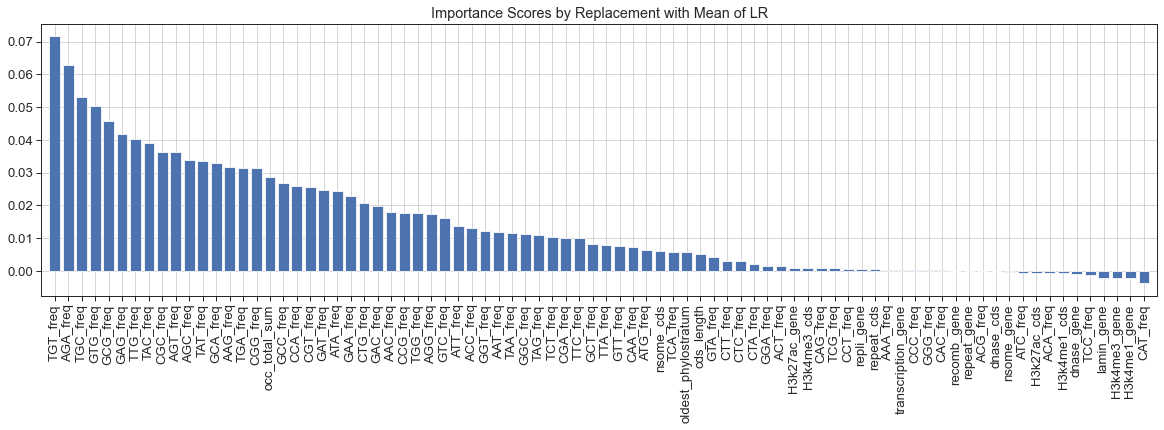

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Confounder PCA as ColumnTransformer()
confpca = ColumnTransformer([
    ("ots+of", "passthrough", [0, 1]), 
    ("conf", PCA(n_components=None), slice(2, X.shape[1]))
])

# Model as Pipeline
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", confpca),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced")),
])

imp_scores = calc_importances(lr_clf, features_df, y, ranseed=17) 

lr_df = pd.DataFrame(imp_scores, columns=["Score"], index=features_df.columns)

plt.figure(figsize=(20,5))

x_data = lr_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = lr_df.sort_values(by="Score", ascending=False)["Score"].tolist()

plt.bar(x=x_data, height=y_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Replacement with Mean of LR")
plt.xlim(-1,82)
# plt.savefig("./figures/lr_fi.png", dpi=100, bbox_inches="tight")
plt.show()

## LR with PCA dimensionality reduction

baseline 0.658729623621726


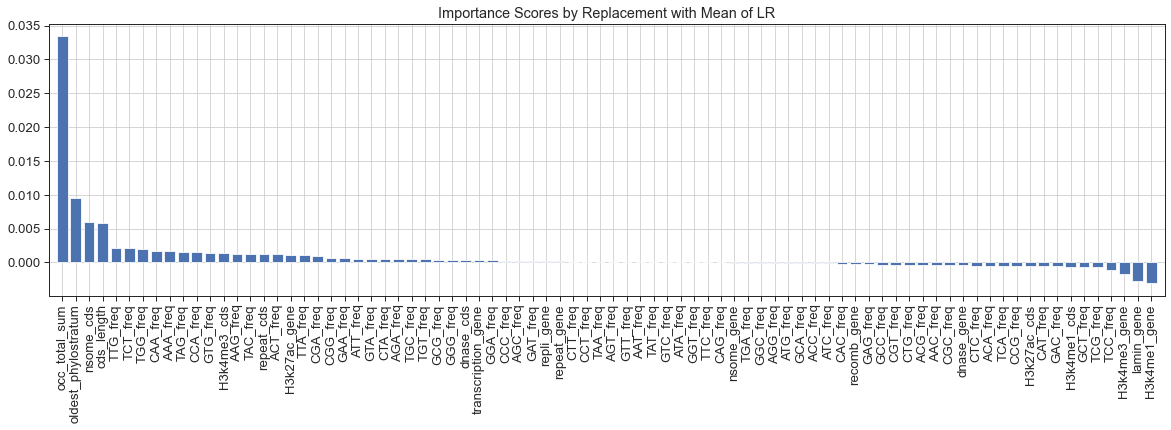

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Confounder PCA as ColumnTransformer()
confpca = ColumnTransformer([
    ("ots+of", "passthrough", [0, 1]), 
    ("conf", PCA(n_components=65), slice(2, X.shape[1]))
])

# Model as Pipeline
lr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", confpca),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced")),
])

imp_scores = calc_importances(lr_clf, features_df, y, ranseed=17) 

lr_df = pd.DataFrame(imp_scores, columns=["Score"], index=features_df.columns)

plt.figure(figsize=(20,5))

x_data = lr_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = lr_df.sort_values(by="Score", ascending=False)["Score"].tolist()

plt.bar(x=x_data, height=y_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Replacement with Mean of LR")
plt.xlim(-1,82)
# plt.savefig("./figures/lr_fi.png", dpi=100, bbox_inches="tight")
plt.show()

## GNB

baseline 0.6124420675042345


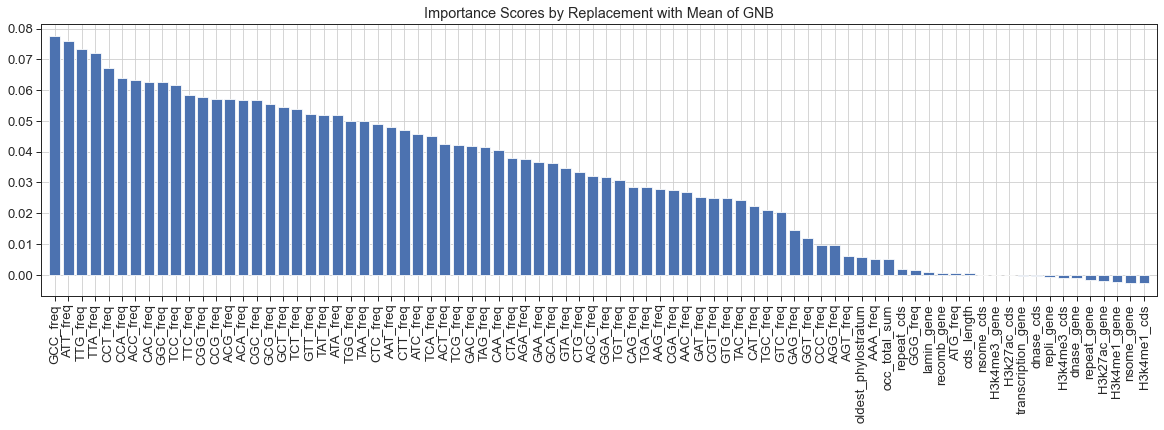

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from  sklearn.naive_bayes import GaussianNB

# Confounder PCA as ColumnTransformer()
confpca = ColumnTransformer([
    ("ots+of", "passthrough", [0, 1]), 
    ("conf", PCA(n_components=None), slice(2, X.shape[1]))
])

# Model as Pipeline
gnb_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", confpca),
    ("gnb", GaussianNB()),
])

imp_scores = calc_importances(gnb_clf, features_df, y, ranseed=15) 

gnb_df = pd.DataFrame(imp_scores, columns=["Score"], index=features_df.columns)

plt.figure(figsize=(20,5))

x_data = gnb_df.sort_values(by="Score", ascending=False).index.tolist()
y_data = gnb_df.sort_values(by="Score", ascending=False)["Score"].tolist()

plt.bar(x=x_data, height=y_data)

plt.xticks(rotation=90)
plt.title("Importance Scores by Replacement with Mean of GNB")
plt.xlim(-1,82)
# plt.savefig("./figures/lr_fi.png", dpi=100, bbox_inches="tight")
plt.show()

## Correlations

SpearmanrResult(correlation=0.7860275791512935, pvalue=2.188873222794569e-18)


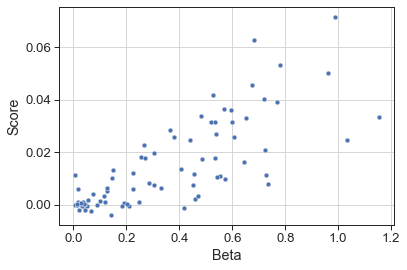

In [35]:
beta_df = pd.read_csv("./results/lr_betas.csv", index_col=0)
lr_perm_df = pd.read_csv("./results/lr_fi.csv", index_col=0)

xseries = abs(beta_df["Beta"])
yseries = lr_df["Score"]

sns.scatterplot(x=xseries, y=yseries)
plt.title("Means importance vs beta")
print(spearmanr(xseries, yseries))

SpearmanrResult(correlation=0.8613206212383409, pvalue=3.057538840397596e-25)


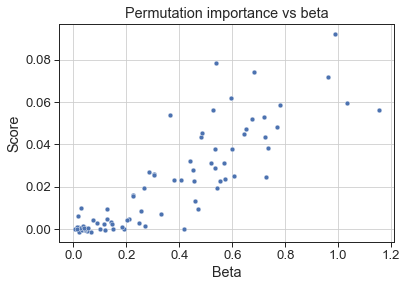

In [37]:
xseries = abs(beta_df["Beta"])
yseries = lr_perm_df["Score"]

sns.scatterplot(x=xseries, y=yseries)
plt.title("Permutation importance vs beta")
print(spearmanr(xseries, yseries))

SpearmanrResult(correlation=0.8679378761659103, pvalue=4.9483418730641465e-26)


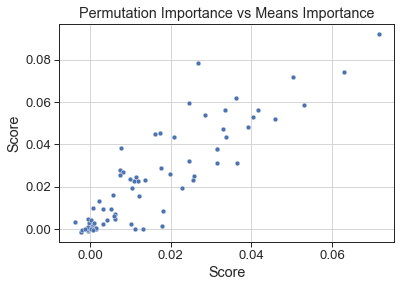

In [39]:
xseries = lr_df["Score"]
yseries = lr_perm_df["Score"]

sns.scatterplot(x=xseries, y=yseries)
plt.title("Permutation Importance vs Means Importance")
print(spearmanr(xseries, yseries))

In [41]:
lr_perm_df.sort_values(by="Score", ascending=False)

,Score,StDev
TGT_freq,0.092192,0.004191
GCC_freq,0.078457,0.005187
AGA_freq,0.074226,0.006415
GTG_freq,0.071999,0.006408
AGT_freq,0.061734,0.004073
ATA_freq,0.059680,0.005595
TGC_freq,0.058510,0.005651
TAT_freq,0.056370,0.005586
GAG_freq,0.056082,0.004452
occ_total_sum,0.054061,0.004261


In [42]:
lr_df.sort_values(by="Score", ascending=False)

,Score
TGT_freq,0.071659
AGA_freq,0.062976
TGC_freq,0.053146
GTG_freq,0.050293
GCG_freq,0.045757
GAG_freq,0.041672
TTG_freq,0.040411
TAC_freq,0.039154
CGC_freq,0.036329
AGT_freq,0.036276


In [45]:
beta_df.sort_values(by="Beta", ascending=False, key=abs)

,Beta
TAT_freq,1.153554
ATA_freq,-1.031312
TGT_freq,-0.986162
GTG_freq,0.959409
TGC_freq,-0.780866
TAC_freq,0.767115
TTA_freq,-0.736382
TAA_freq,0.728060
CTG_freq,0.724682
TTG_freq,0.721485
